**MNIST**

In [53]:
##############################################################
# 16-1 MNIST : Data 읽기
##############################################################
from tensorflow.keras.datasets import mnist
import tensorflow as tf

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [54]:
X_train.shape, Y_class_train.shape, X_test.shape, Y_class_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [55]:
for line in X_train[0]:
    for cell in line:
        print("%3d" % cell, end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

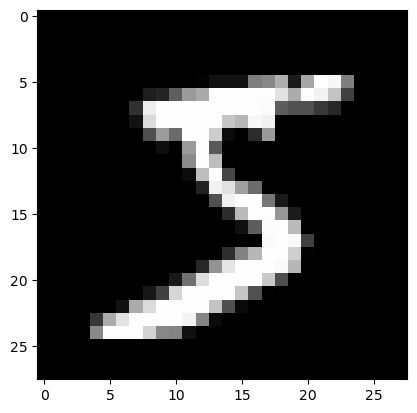

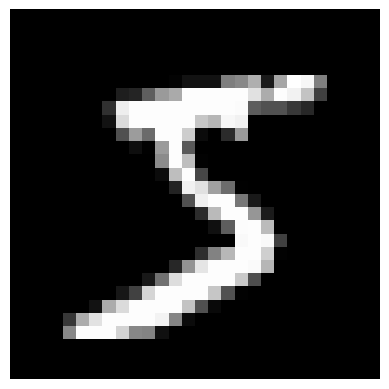

In [56]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

plt.imshow(X_train[0] / 255, cmap='gray')
# 눈금 없애기
plt.axis('off')
plt.show()

In [57]:
# 0 ~ 1로 Rescaling (정규화)
(X_train[0] / 255).max(), (X_train[0] / 255).min()

(np.float64(1.0), np.float64(0.0))

In [58]:
from PIL import Image

# 0 ~ 255 정수이어야만 함
Image.fromarray(X_train[0])

In [59]:
# 클래스 값(Y) 확인
Y_class_train.shape, Y_class_train

((60000,), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [60]:
# One Hot Encoding: 출력 레이어의 노드 수 = 10개 (출력클래스 10개)
Y_train = tf.keras.utils.to_categorical(Y_class_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_class_test, 10)
Y_train[:3], Y_class_train[:3]

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]),
 array([5, 0, 4], dtype=uint8))

#### 코드정리 ####

In [61]:
##############################################################
# 16-2 MNIST : Simple 코드 (20초 소요) - 정확도 98%대
##############################################################
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X 데이터 한줄로 만들어서(Flatten) 정규화(Normalization) (0 ~ 1 사이로 Rescaling)
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# Y 데이터 One-Hot Encoding (10개 클래스)
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [62]:
# 모델 설계
model = Sequential()

# 은닉층(Hidden Layer)에는 relu
# model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(256, activation='relu'))

# 다중분류: softmax, 이진분류: sigmoid, 회귀:default
model.add(Dense(10, activation='softmax'))

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
# 모델 실행 환경 설정 (Complie)
# loss: 회귀: mse, 이진분류: binary_crossentropy, 다중분류: categorical_crossentropy
# optimizer: sgd,  momentum, adagrad, ... , adam(가장 많이사용)
# metrics: 측정지표: 분류일때 accuracy
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# Best 모델 저장 콜백함수 정의
checkpointer = ModelCheckpoint(
    filepath='./model/mnist_model.keras',       # 확장자: h5, hdf5 -> keras(많이 씀)
    monitor='val_loss',                         # 모델 평가 기준을 검증 데이터의 loss로 지정
    # verbose=1,                                  # 파일 저장시 로그 출력(1), 출력안함(0, 생략가능)
    save_best_only=True                         # 가장 좋은 모델만 저장
)

early_stopping = EarlyStopping(
    monitor='val_loss',                         # 조기종료 조건을 체크하는 기준
    patience=5,                                 # 5 epoch 동안 개선이 없으면 학습종료
    restore_best_weights=True                   # 최적 가중치를 복원
)

In [64]:
# 모델 학습
history = model.fit(X_train, Y_train,
                    # validation_data=(X_test, Y_test),             # 검증데이터를 지정하는 경우
                    validation_split=0.2,                           # 학습데이터의 일부를 검증데이터로 사용
                    epochs=30,                                      # 30번 반복
                    batch_size=128,                                 # 메모리에 맞게 조정
                    verbose=1,                                      # 0: 학습과정 안보임, 1: 자제히 출력(default), 2: 간간히 출력
                    callbacks=[early_stopping, checkpointer])

# 테스e트 정확도 출력
score = model.evaluate(X_test, Y_test)
score

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9247 - loss: 0.2562 - val_accuracy: 0.9647 - val_loss: 0.1165
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9720 - loss: 0.0920 - val_accuracy: 0.9679 - val_loss: 0.0994
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9826 - loss: 0.0573 - val_accuracy: 0.9739 - val_loss: 0.0846
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9769 - val_loss: 0.0753
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9747 - val_loss: 0.0866
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9924 - loss: 0.0230 - val_accuracy: 0.9780 - val_loss: 0.0833
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9777 - val_loss: 0.0836
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accu

[0.06753518432378769, 0.9783999919891357]

In [65]:
# 테스e트 정확도 출력
score = model.evaluate(X_test, Y_test)

# [loss, accuracy]
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0675


[0.06753518432378769, 0.9783999919891357]

In [66]:
# 학습과정 시각화
import pandas as pd

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [67]:
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.924667,0.256220,0.964667,0.116477
1,0.971979,0.092003,0.967917,0.099353
2,0.982562,0.057338,0.973917,0.084619
3,0.987938,0.038575,0.976917,0.075318
4,0.990792,0.028999,0.974750,0.086630
5,0.992375,0.023033,0.978000,0.083335
6,0.994417,0.016456,0.977667,0.083582
7,0.995021,0.015854,0.975917,0.090381
8,0.996625,0.010661,0.974833,0.096573


<Axes: >

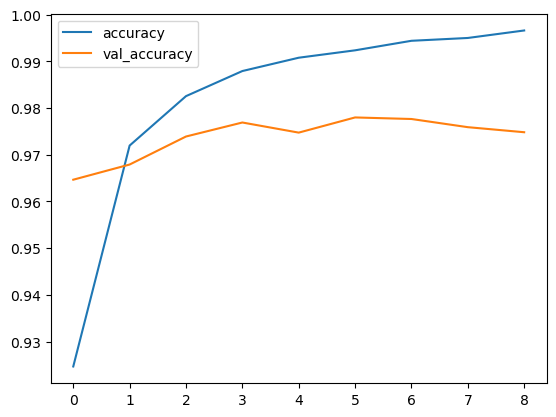

In [68]:
df_history[['accuracy', 'val_accuracy']].plot()

<Axes: >

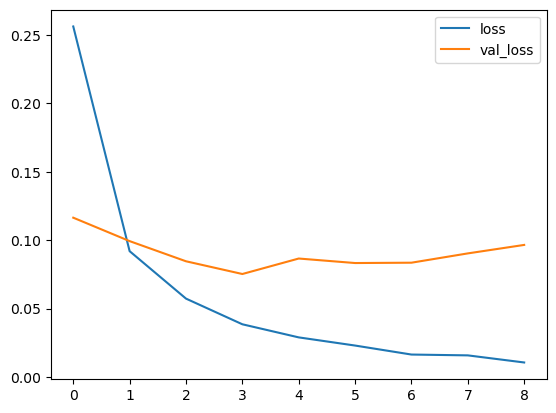

In [69]:
df_history[['loss', 'val_loss']].plot()

___

## 모델 저장하고 불러오기

In [70]:
# model.summary()

In [71]:
# 모델저장 (h5, h5df, keras 확장자로 저장)
model.save('saved_model.keras')

In [72]:
# 모델 불러오기
from tensorflow.keras.models import load_model

model_read = load_model('saved_model.keras')
model_read.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

### 모델 검증하기

In [73]:
# 학습데이터와 같은 과정으로 X 데이터 정규화, Flatten, Y 데이터: One Hot Encoding
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0675


[0.06753518432378769, 0.9783999919891357]

In [74]:
# 읽은 모델로 검증해보기
model_read.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0675


[0.06753518432378769, 0.9783999919891357]

### 학습된 모델로 새로운 데이터를 예측하기

In [75]:
X_train.shape, X_train.ndim

((60000, 784), 2)

In [76]:
# flatten과 정규화(0 ~ 1)가 완료된 데이터(2차원)를 입력해야함
# X_test[0]
new_X = X_test[:3]
new_X.shape

(3, 784)

In [77]:
Y_pred = model_read.predict(new_X)
Y_pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


(3, 10)

In [78]:
Y_train.shape

(60000, 10)

In [79]:
Y_pred.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.994, 0.   , 0.   , 0.001, 0.   , 0.   , 0.003, 0.001,
        0.   ]], dtype=float32)

In [80]:
Y_pred.argmax(axis=1)

array([7, 2, 1])

In [81]:
# 정답과 비교
Y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [82]:
Y_test[:3].argmax(axis=1)

array([7, 2, 1])

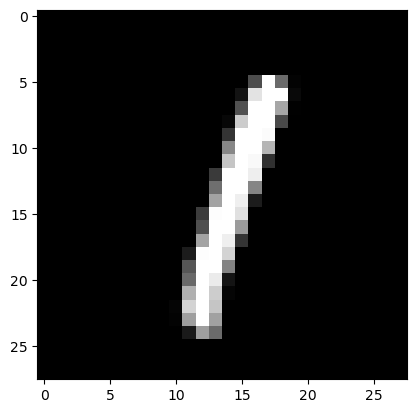

In [83]:
plt.imshow(X_test[5].reshape(28, 28), cmap='gray')

@@@ 오답 @@@
Y값 4 != 예측값 2


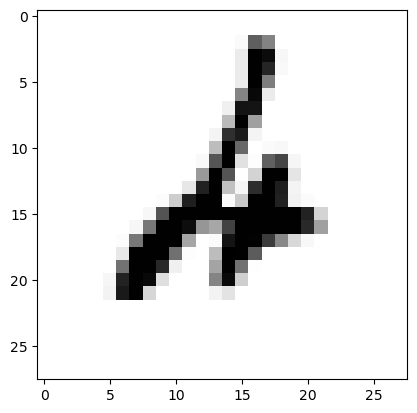

@@@ 오답 @@@
Y값 2 != 예측값 7


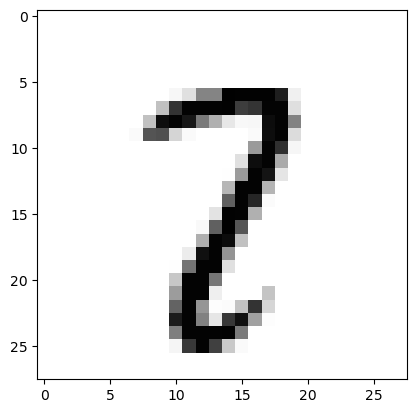

@@@ 오답 @@@
Y값 5 != 예측값 3


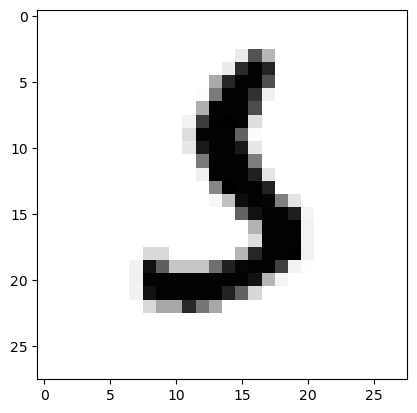

@@@ 오답 @@@
Y값 3 != 예측값 7


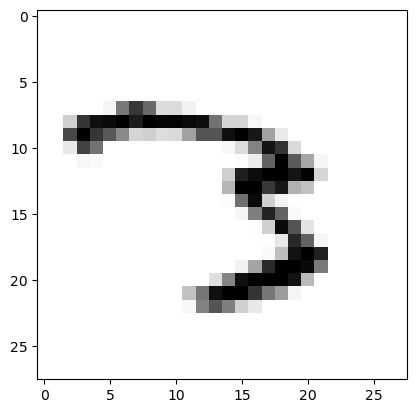

@@@ 오답 @@@
Y값 8 != 예측값 9


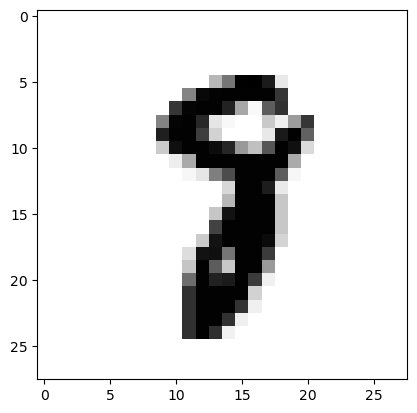

@@@ 오답 @@@
Y값 6 != 예측값 0


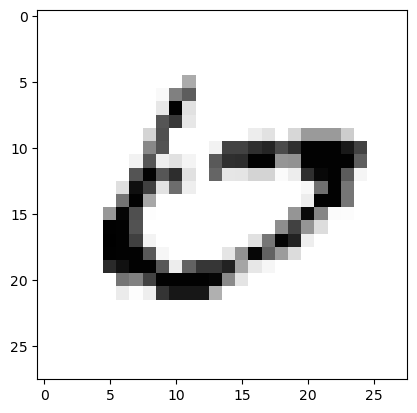

@@@ 오답 @@@
Y값 4 != 예측값 9


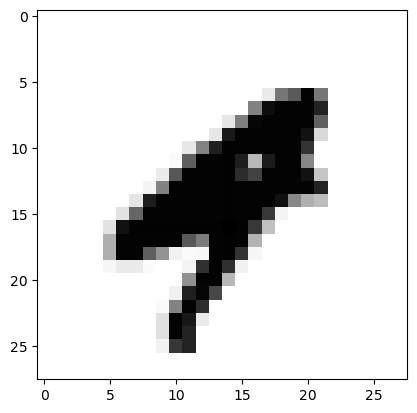

@@@ 오답 @@@
Y값 8 != 예측값 2


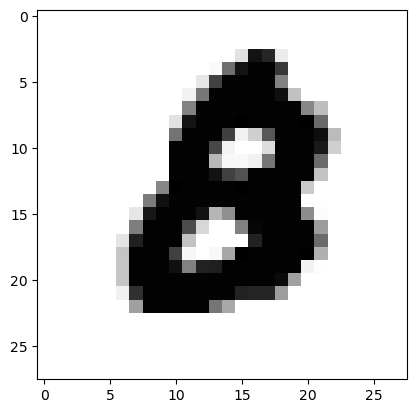

@@@ 오답 @@@
Y값 8 != 예측값 2


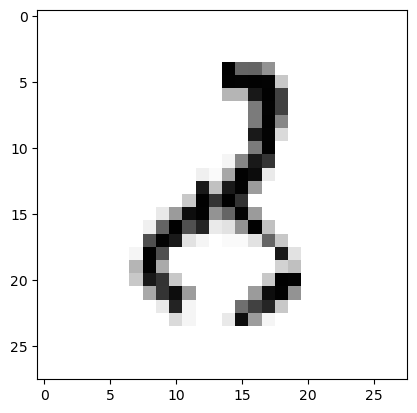

@@@ 오답 @@@
Y값 2 != 예측값 7


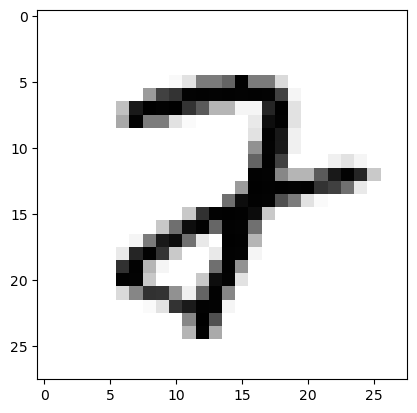

@@@ 오답 @@@
Y값 2 != 예측값 8


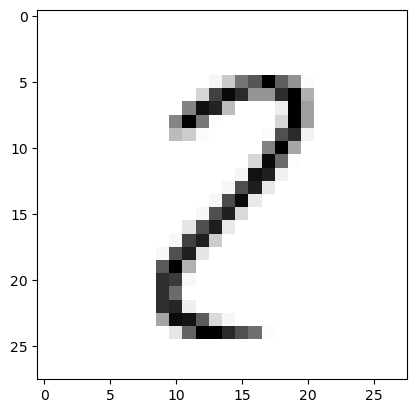

@@@ 오답 @@@
Y값 6 != 예측값 4


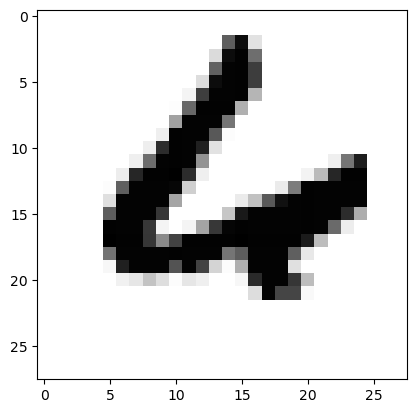

@@@ 오답 @@@
Y값 2 != 예측값 1


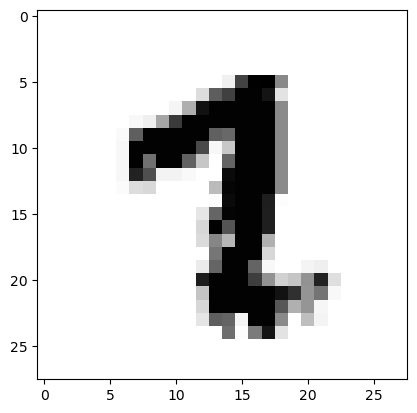

@@@ 오답 @@@
Y값 7 != 예측값 3


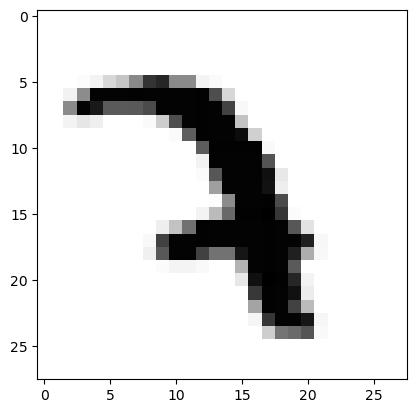

@@@ 오답 @@@
Y값 8 != 예측값 4


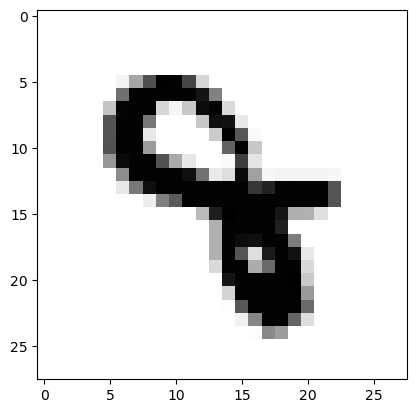

@@@ 오답 @@@
Y값 4 != 예측값 9


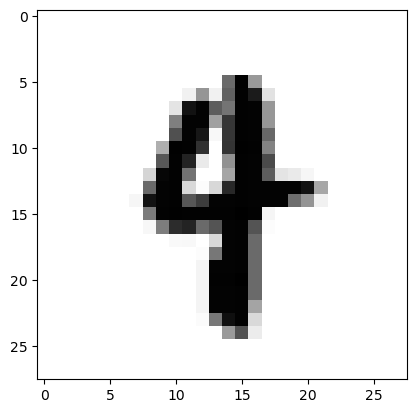

@@@ 오답 @@@
Y값 4 != 예측값 9


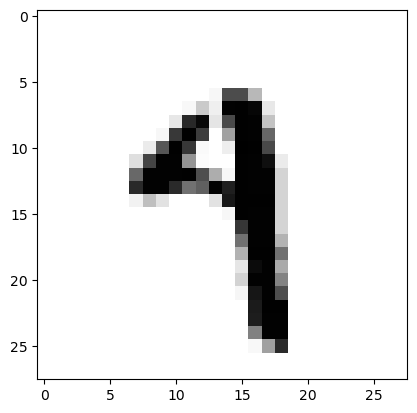

@@@ 오답 @@@
Y값 3 != 예측값 5


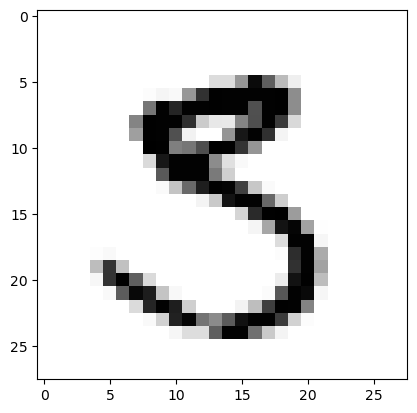

@@@ 오답 @@@
Y값 8 != 예측값 9


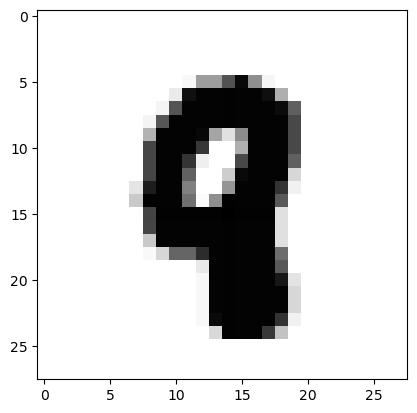

@@@ 오답 @@@
Y값 5 != 예측값 4


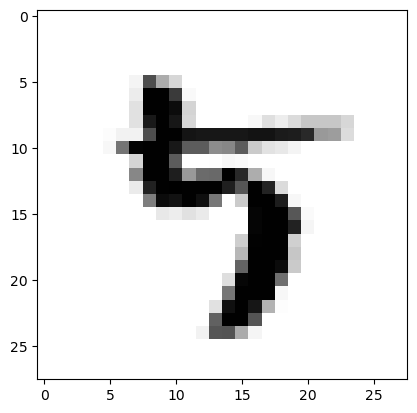

In [84]:
#############################################################
# Test data 중 오답 print
#############################################################
error_cnt = 0  # 20개만 찾고 중단 (시간 문제)
for i in range(len(X_test)):
    predicted = model.predict(X_test[i].reshape(-1, 28*28), verbose=0).argmax()
    if Y_test[i].argmax() != predicted:
        error_cnt += 1
        print("@@@ 오답 @@@")
        print(f"Y값 {Y_test[i].argmax()} != 예측값 {predicted}")
        plt.imshow(X_test[i].reshape(28, 28), cmap='Greys' )  
        plt.show()
        if error_cnt >= 20:  # 10개만 찾아 보기
            break

___

### Y 데이터 One Hot Encoding 없이
### loss='sparse_categorical_crossentropy'를 사용하여 학습하기

In [85]:
##############################################################
# 16-2 MNIST : Simple 코드 (20초 소요) - 정확도 98%대
##############################################################
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# One-Hot
# Y_train = tf.keras.utils.to_categorical(Y_train, 10)
# Y_test = tf.keras.utils.to_categorical(Y_test, 10)

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정

# modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"  # keras 2.x
# modelpath="./model/{epoch:02d}-{val_loss:.4f}.keras"   # keras 3.x
modelpath="./model/mnist_model2(sparse).keras"  # best모델만 저장

# Best 모델 저장 콜백함수 정의
checkpointer = ModelCheckpoint(
    filepath=modelpath,   # 확장자: h5, hdf5 -> keras
    monitor='val_loss',                     # 모델 평가 기준을 검증 데이터의 loss로 지정
    verbose=1,                              # 파일 저장시 로그 출력(1), 출력안함(0:생략)
    save_best_only=True                     # 가장 좋은 모델만 저장
)

early_stopping = EarlyStopping(
    monitor='val_loss',         # 조기종료 조건을 체크하는 기준
    patience=5,                 # 5 epoch동안 개선이 없으면 학습 조기 종료
    restore_best_weights=True   # 최적 가중치를 복원
)

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
# 모델의 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    # validation_split=0.2,
                    epochs=1000, batch_size=100, verbose=1, 
                    callbacks=[early_stopping, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/1000
593/600 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0605
Epoch 1: val_loss did not improve from 0.07223
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9815 - loss: 0.0579 - val_accuracy: 0.9759 - val_loss: 0.0823
Epoch 2/1000
597/600 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9913 - loss: 0.0281
Epoch 2: val_loss improved from 0.07223 to 0.06481, saving model to ./model/mnist_model2(sparse).keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9910 - loss: 0.0285 - val_accuracy: 0.9789 - val_loss: 0.0648
Epoch 3/1000
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9955 - loss: 0.0162
Epoch 3: val_loss improved from 0.06481 to 0.06329, saving model to ./model/mnist_model2(sparse).keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0168 - val_accuracy: 0.9807 - val_loss: 0.0633
Epoch 4/1000
595/600 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9962 - loss: 0.0134
Epoch 4: val_loss did not improve from 0.063

In [87]:
# Y 데이터를 One Hot Encoding 없이 loss='sparse_categorical_crossentopy' 사용
Y_train.shape, Y_test.shape

((60000,), (10000,))

In [88]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [89]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [90]:
model.evaluate(X_train, Y_train, verbose=0)

[0.025498906150460243, 0.9939833283424377]

In [91]:
# 100번째, 200번재, 400번재 데이터로 예측하기
Y_pred = model.predict(X_test[[100, 200, 400]])
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[5.4096745e-05, 4.7517574e-06, 4.5137817e-06, 6.0022884e-08,
        3.4331870e-06, 2.3833587e-05, 9.9990284e-01, 2.6554319e-06,
        3.3302033e-06, 4.5800496e-07],
       [7.1466215e-09, 1.2586915e-10, 9.2246455e-06, 9.9992371e-01,
        3.0398532e-14, 1.8352013e-05, 3.5101783e-11, 1.2549867e-12,
        4.8757625e-05, 8.9411911e-10],
       [3.8202463e-03, 1.9354192e-09, 9.9615896e-01, 6.9537595e-07,
        4.0538794e-07, 1.1311352e-10, 3.0468783e-07, 1.2601026e-06,
        1.7664914e-05, 4.1882552e-07]], dtype=float32)

In [92]:
# One Hot Encoding 없이 sparse_categorical_crossentropy를 사용해도 
# 출력은 One Hot 형태로 출력됨 (softmax: 각 클래스별 확률로 출력)
Y_pred.shape

(3, 10)

In [93]:
Y_pred.argmax(axis=1)

array([6, 3, 2])